<h2> Credit Card Fraud Detection </h2>

<b> Business Case </b>

E-commerce stores and companies put a lot of money into prevention of financial fraud. A single fraud can cost a lot of money and therefore should be prevented. The estimated cos of fraud in the U.S. last year alone is over nine billion dollars and is increasing.

Goal is to predict fraudulent transactions.

<b> Data </b>

Public dataset with real credit card transactions that have been anonymized. Dataset is highly unbalanced, because credit card fraud is (luckily) an exception.




<b> Importing and loading data </b>

In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

data = pd.read_csv('creditcard.csv')

C:\Users\A666524\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<b> Exploratory Data Analysis and Feature Engineering </b>

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [4]:
data = data.drop(['Time'],axis=1)

<b> Model training and fitting </b>

In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [9]:
# decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [11]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9992977774656788

In [13]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
y_pred = decision_tree.predict(X)

In [15]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284292     23]
 [    37    455]]


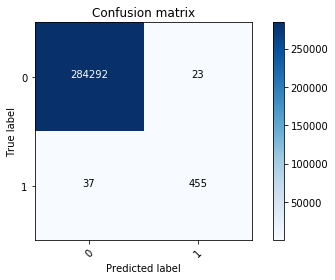

In [16]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [18]:
# random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

In [20]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9995435553526912

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


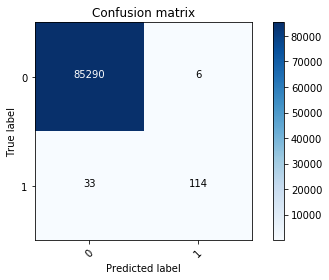

In [24]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [25]:
y_pred = random_forest.predict(X)

Confusion matrix, without normalization
[[284309      6]
 [    33    459]]


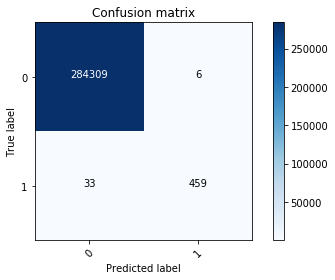

In [26]:
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [27]:
# deep learning

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 16s 81us/step - loss: 0.0094 - acc: 0.9984
Epoch 2/5
199364/199364 [==============================] - 15s 74us/step - loss: 0.0040 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 15s 75us/step - loss: 0.0039 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 16s 81us/step - loss: 0.0039 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 17s 85us/step - loss: 0.0035 - acc: 0.9994


In [31]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 1s 17us/step
[0.003706058144492284, 0.999403110845827]


In [34]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

Confusion matrix, without normalization
[[85275    21]
 [   30   117]]


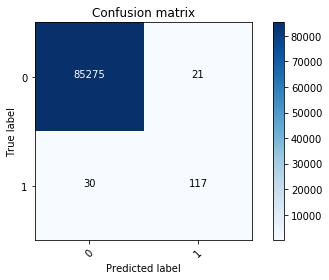

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [39]:
# undersampling

In [40]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [41]:
normal_indices = data[data.Class == 0].index

In [42]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [43]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [44]:
under_sample_data = data.iloc[under_sample_indices,:]

In [45]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 762us/step - loss: 0.4574 - acc: 0.9230
Epoch 2/5
688/688 [==============================] - 0s 67us/step - loss: 0.1767 - acc: 0.9419
Epoch 3/5
688/688 [==============================] - 0s 102us/step - loss: 0.1584 - acc: 0.9433
Epoch 4/5
688/688 [==============================] - 0s 90us/step - loss: 0.1508 - acc: 0.9462
Epoch 5/5
688/688 [==============================] - 0s 92us/step - loss: 0.1482 - acc: 0.9506


Confusion matrix, without normalization
[[150   0]
 [ 17 129]]


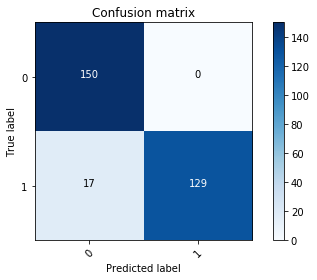

In [50]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283352    963]
 [    51    441]]


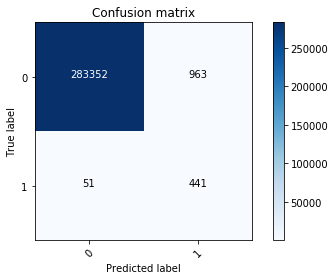

In [51]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

<b> Conclusion </b>

This was an attempt to solve one of e-commerce biggest treaths. Classifier was build to detect fraud while not interfering too much with regular customer. The data was highly imbalanced. Therefore Different algorithms and undersampling were used. SMOTE can perhaps be used to oversample and get even better performance.